In [1]:
import os

import numpy as np
np.set_printoptions(precision=2)
import torch
import matplotlib.pyplot as plt

from bmadx import Particle
from bmadx.plot import plot_projections

from stats import (
    read_all_particles,
    show_cov_stats,
    plot_projections_with_contours
)

In [2]:
dr = os.path.join('data', 'non_gaussian_beam', 'stats_t_2')

In [3]:
gt = torch.load(os.path.join(dr, 'non_gaussian_beam.pt')).numpy_particles()

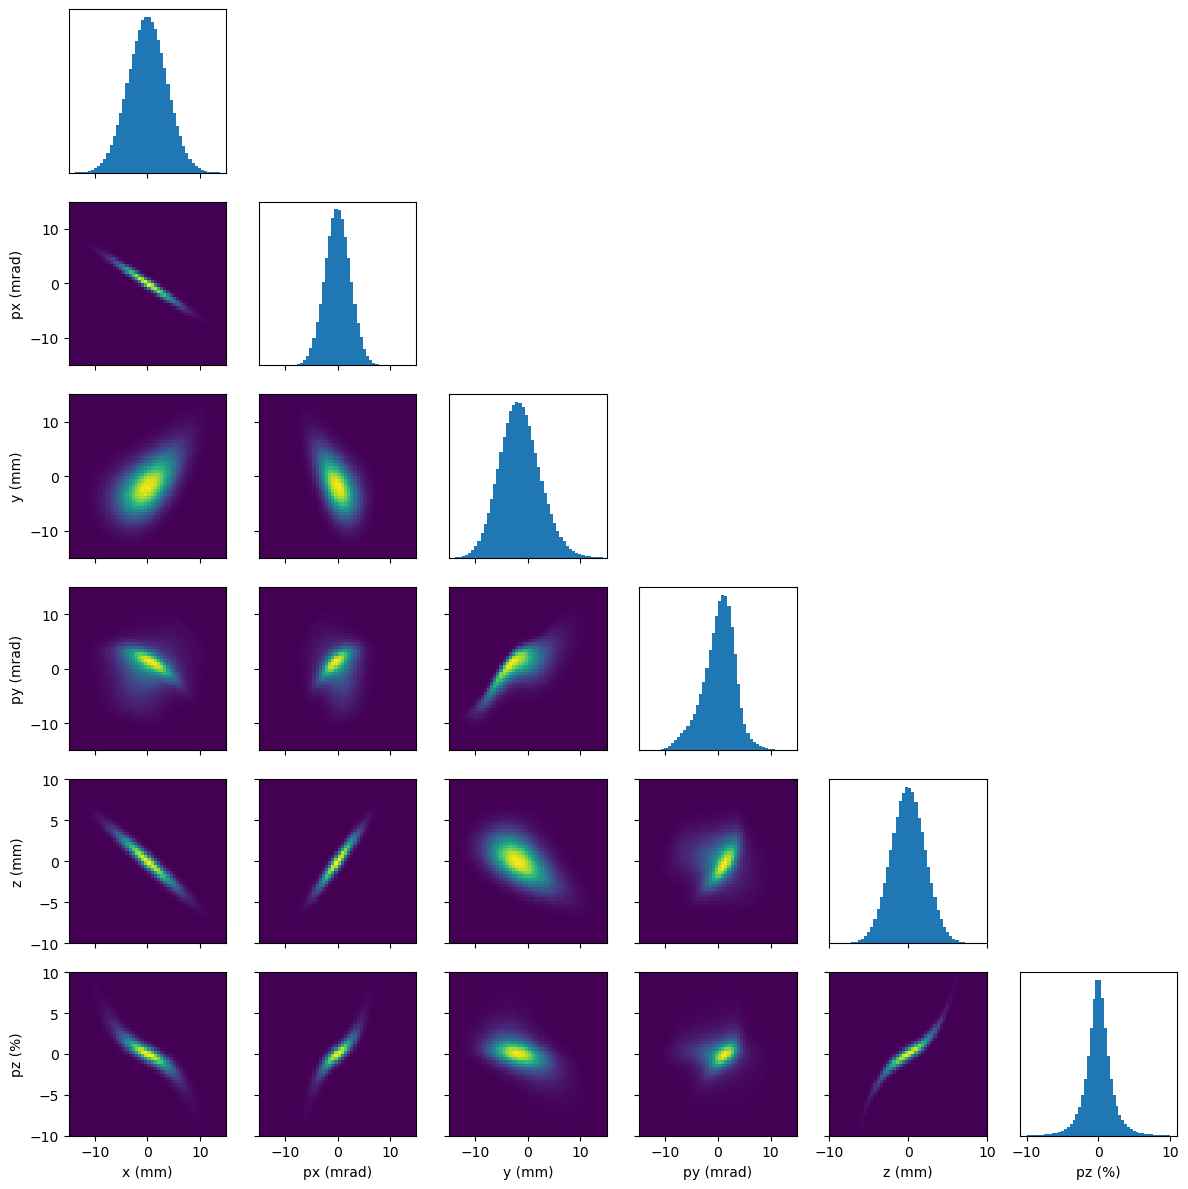

In [4]:
# plot gt:
lims = np.array([
    [-15e-3,15e-3],
    [-15e-3,15e-3],
    [-15e-3,15e-3],
    [-15e-3,15e-3],
    [-10e-3,10e-3],
    [-10e-2,10e-2]
])
plot_projections(gt, custom_lims=lims)
plt.show()

In [5]:
n_beams = 10
n_par = 100_000

pars = read_all_particles(
    dr = dr,
    n_beams = n_beams, 
    n_par = n_par
)

In [6]:
par_concat = np.swapaxes(pars, 0, 1).reshape((6, n_par*n_beams))

In [7]:
r_avg = Particle(
    *par_concat,
    p0c = gt.p0c,
    s = gt.s,
    mc2 = gt.mc2
)

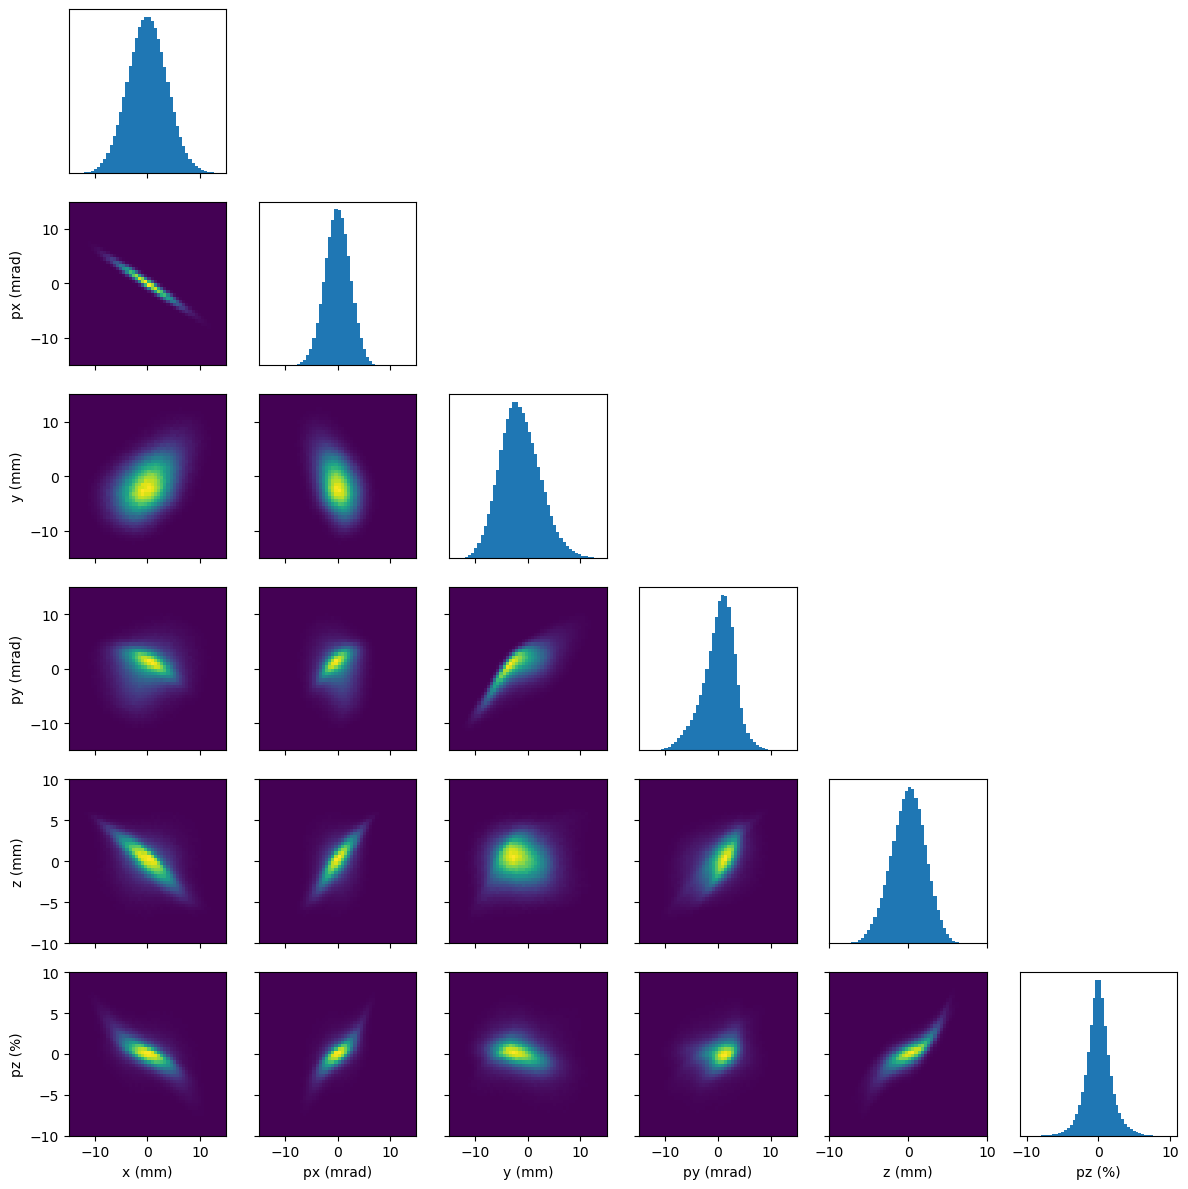

In [8]:
plot_projections(r_avg, custom_lims=lims)
plt.show()

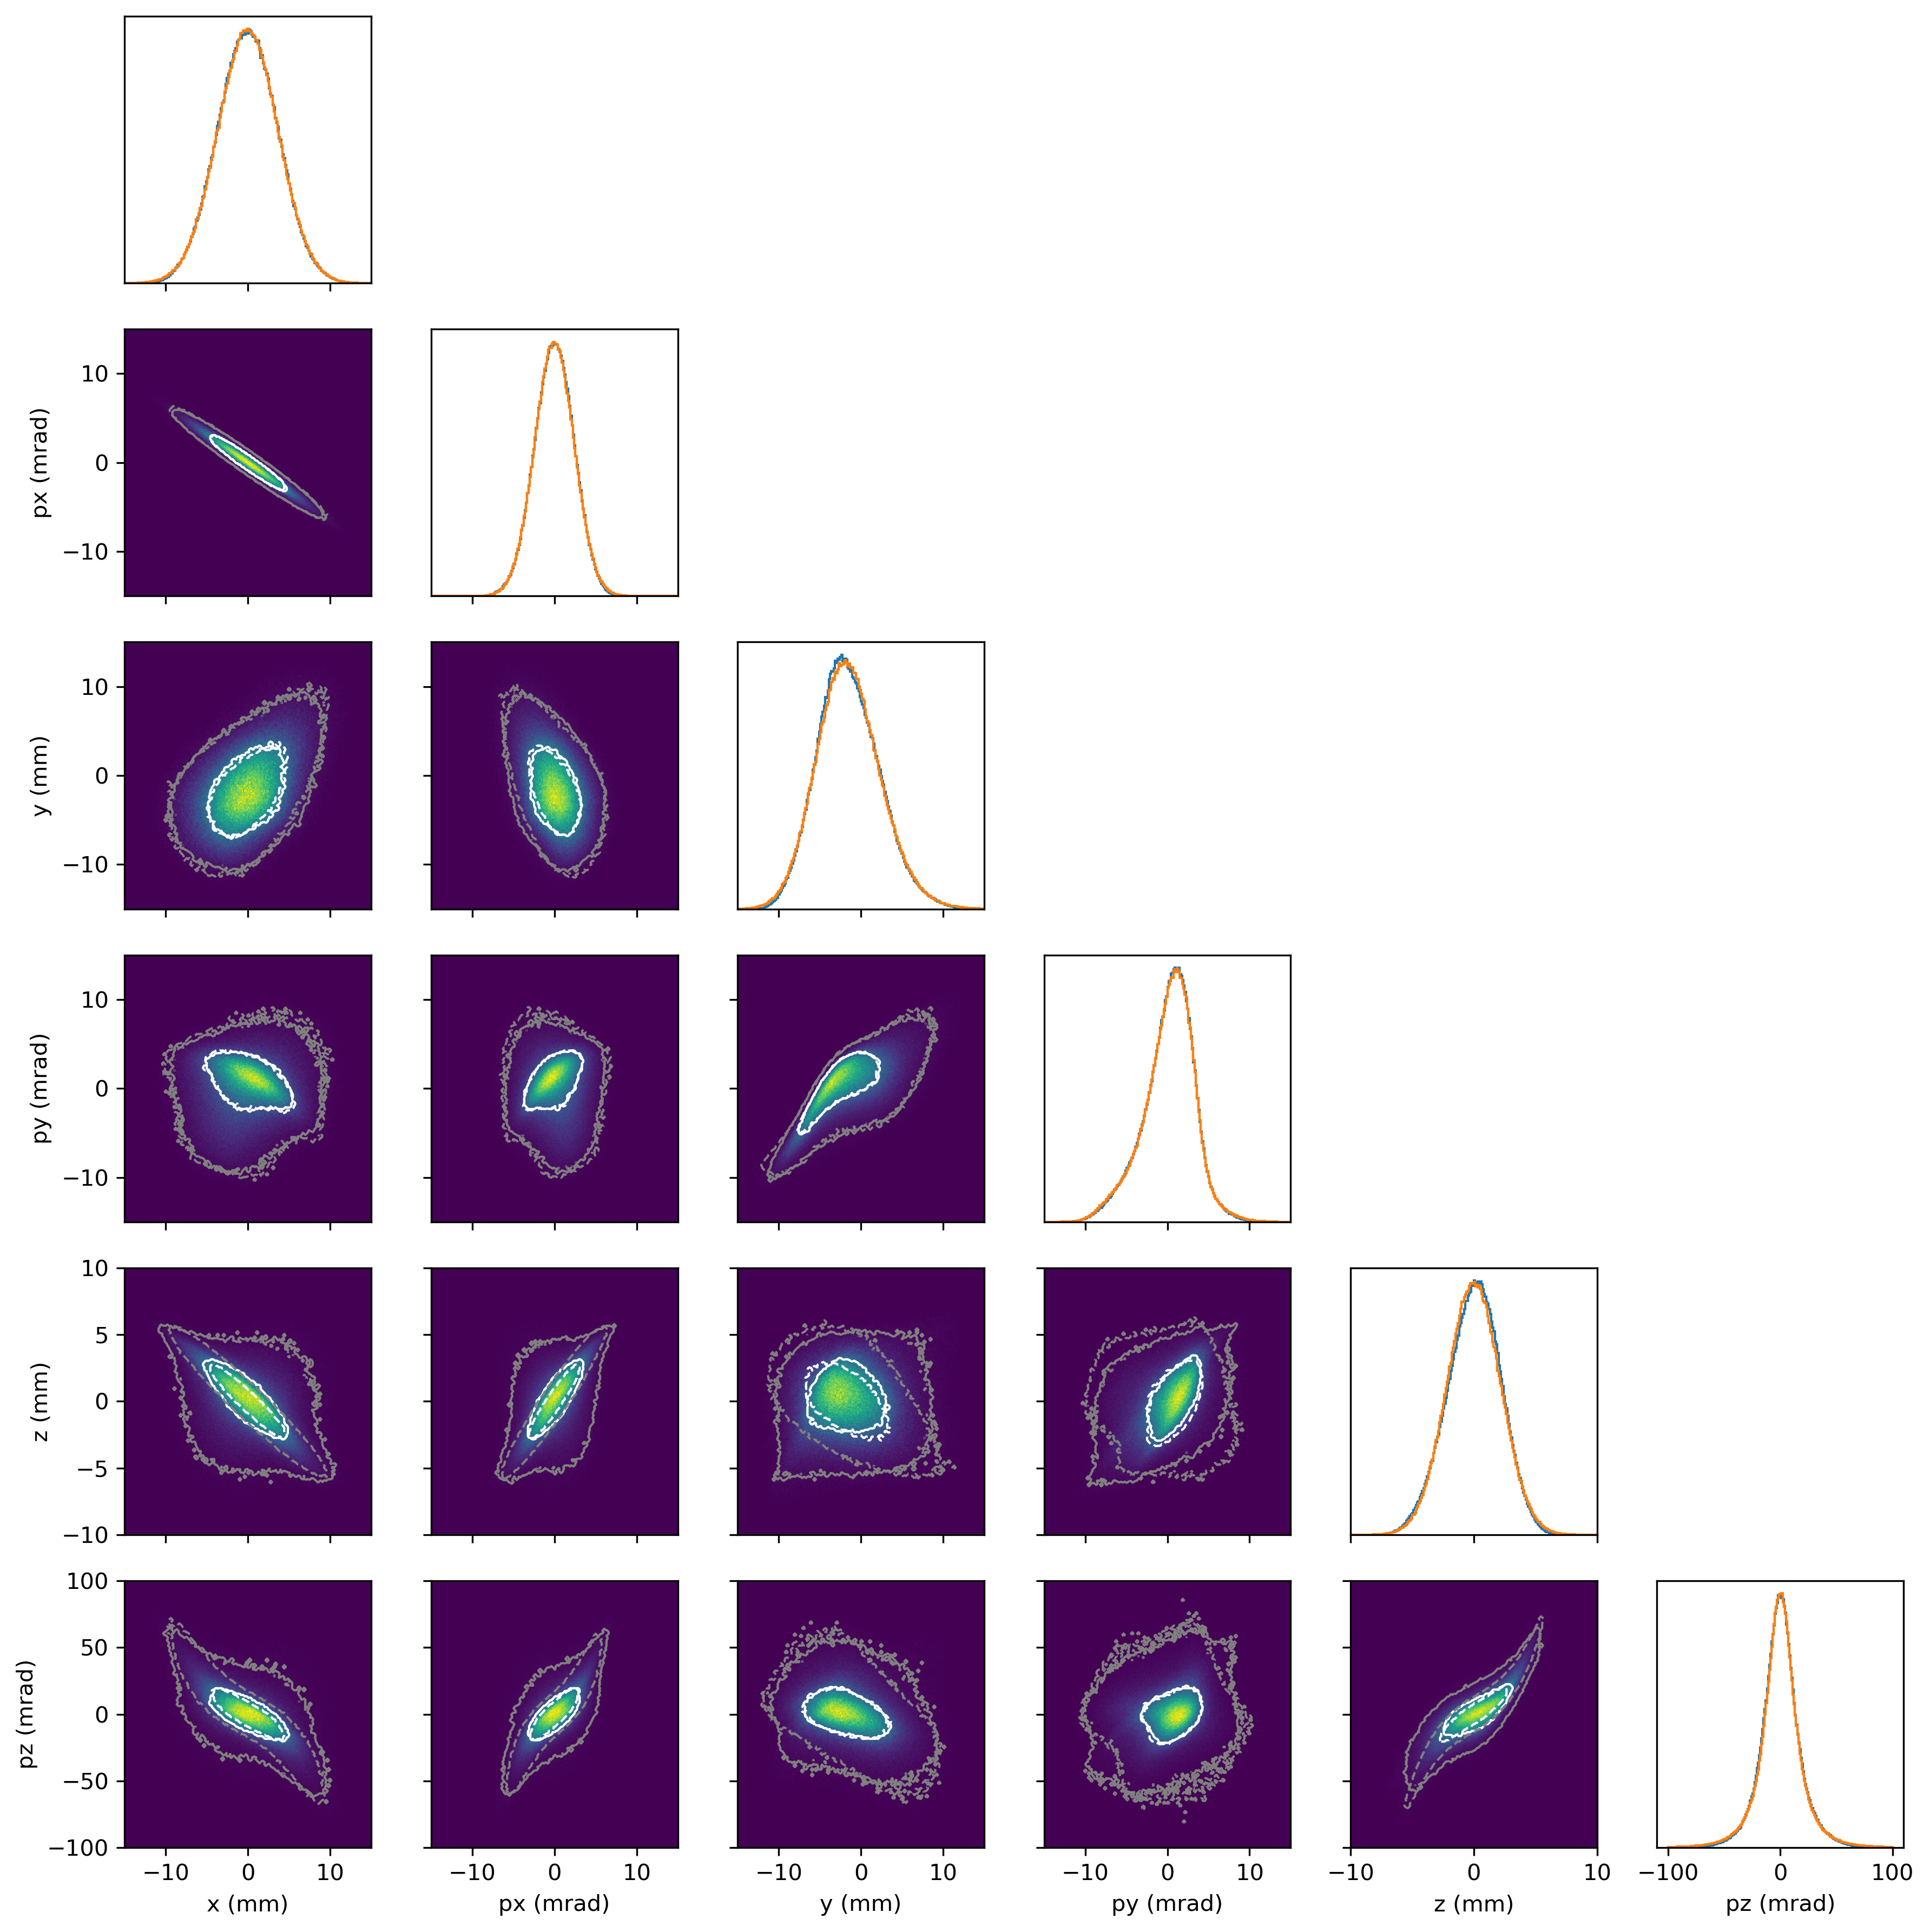

In [9]:
plot_projections_with_contours(
    r_avg,
    gt,
    bins=200,
    contour_percentiles = [50, 95],
    custom_lims=lims,
    contour_smoothing_r=0.5,
    contour_smoothing_gt=0.5
)
plt.show()

ground truth: 
[[ 10.96  -7.01   6.81  -0.54  -6.24 -49.76]
 [ -7.01   4.62  -4.37   0.34   4.04  32.25]
 [  6.81  -4.37  11.02   5.64  -3.93 -31.03]
 [ -0.54   0.34   5.64   6.02   0.31   2.71]
 [ -6.24   4.04  -3.93   0.31   3.74  29.88]
 [-49.76  32.25 -31.03   2.71  29.88 258.59]]

reconstruction avg: 
[[ 9.12e+00 -5.80e+00  4.77e+00 -8.48e-02 -3.29e+00 -3.02e+01]
 [-5.80e+00  3.83e+00 -2.75e+00  2.76e-01  2.20e+00  1.97e+01]
 [ 4.77e+00 -2.75e+00  1.02e+01  5.26e+00 -5.07e-01 -1.81e+01]
 [-8.48e-02  2.76e-01  5.26e+00  5.49e+00  1.91e+00  5.61e+00]
 [-3.29e+00  2.20e+00 -5.07e-01  1.91e+00  3.12e+00  2.04e+01]
 [-3.02e+01  1.97e+01 -1.81e+01  5.61e+00  2.04e+01  1.96e+02]]

reconstruction std: 
[[ 0.9   0.56  0.72  0.25  2.42 14.32]
 [ 0.56  0.36  0.53  0.14  1.49  9.07]
 [ 0.72  0.53  0.63  0.39  1.87 10.3 ]
 [ 0.25  0.14  0.39  0.38  0.86  3.45]
 [ 2.42  1.49  1.87  0.86  0.4   4.45]
 [14.32  9.07 10.3   3.45  4.45 30.59]]

reconstruction relative uncertainty: 
[[ 0.1  -0.1   0.

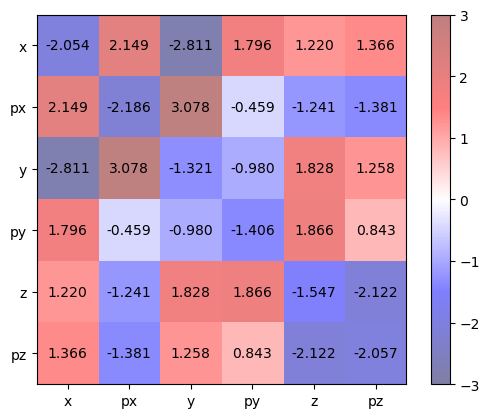

In [10]:
show_cov_stats(pars, gt, beam_fraction=0.5)

ground truth: 
[[ 12.02  -7.66   6.85  -0.71  -6.77 -55.52]
 [ -7.66   5.12  -4.39   0.46   4.41  36.11]
 [  6.85  -4.39  13.66   8.29  -3.94 -32.25]
 [ -0.71   0.46   8.29   9.12   0.41   3.34]
 [ -6.77   4.41  -3.94   0.41   4.12  33.83]
 [-55.52  36.11 -32.25   3.34  33.83 307.48]]

reconstruction avg: 
[[ 1.21e+01 -7.69e+00  5.42e+00 -6.93e-02 -3.97e+00 -3.77e+01]
 [-7.69e+00  5.13e+00 -3.07e+00  3.49e-01  2.70e+00  2.50e+01]
 [ 5.42e+00 -3.07e+00  1.31e+01  7.84e+00  2.63e-01 -1.58e+01]
 [-6.93e-02  3.49e-01  7.84e+00  8.65e+00  3.02e+00  1.13e+01]
 [-3.97e+00  2.70e+00  2.63e-01  3.02e+00  4.18e+00  2.75e+01]
 [-3.77e+01  2.50e+01 -1.58e+01  1.13e+01  2.75e+01  2.66e+02]]

reconstruction std: 
[[ 0.19  0.14  0.57  0.2   2.9  17.77]
 [ 0.14  0.11  0.45  0.08  1.76 11.09]
 [ 0.57  0.45  0.48  0.38  2.44 15.13]
 [ 0.2   0.08  0.38  0.3   1.48  7.77]
 [ 2.9   1.76  2.44  1.48  0.32  2.6 ]
 [17.77 11.09 15.13  7.77  2.6  19.78]]

reconstruction relative uncertainty: 
[[ 0.02 -0.02  0.

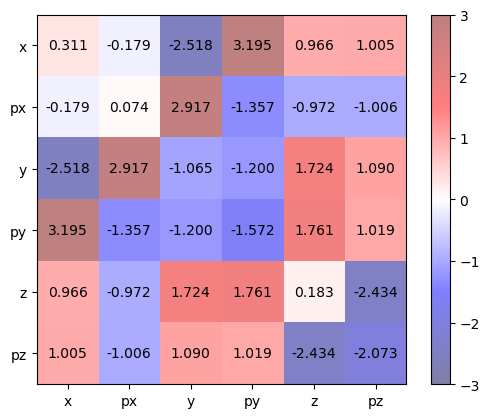

In [11]:
show_cov_stats(pars, gt, beam_fraction=0.95)

ground truth: 
[[ 13.56  -8.66   7.81  -0.57  -7.69 -69.25]
 [ -8.66   5.78  -5.02   0.37   5.    45.06]
 [  7.81  -5.02  15.11   9.07  -4.52 -40.69]
 [ -0.57   0.37   9.07   9.94   0.33   2.71]
 [ -7.69   5.    -4.52   0.33   4.69  42.25]
 [-69.25  45.06 -40.69   2.71  42.25 434.98]]

reconstruction avg: 
[[ 13.21  -8.43   6.01   0.06  -4.3  -42.63]
 [ -8.43   5.63  -3.43   0.29   2.93  28.37]
 [  6.01  -3.43  14.17   8.54   0.44 -15.5 ]
 [  0.06   0.29   8.54   9.48   3.36  13.89]
 [ -4.3    2.93   0.44   3.36   4.62  31.98]
 [-42.63  28.37 -15.5   13.89  31.98 317.9 ]]

reconstruction std: 
[[ 0.11  0.07  0.44  0.26  3.3  22.16]
 [ 0.07  0.06  0.41  0.07  2.   13.81]
 [ 0.44  0.41  0.24  0.13  2.92 19.76]
 [ 0.26  0.07  0.13  0.13  1.76 10.27]
 [ 3.3   2.    2.92  1.76  0.39  2.92]
 [22.16 13.81 19.76 10.27  2.92 27.35]]

reconstruction relative uncertainty: 
[[ 0.01 -0.01  0.07  4.22 -0.77 -0.52]
 [-0.01  0.01 -0.12  0.25  0.68  0.49]
 [ 0.07 -0.12  0.02  0.02  6.7  -1.28]
 [ 4.22 

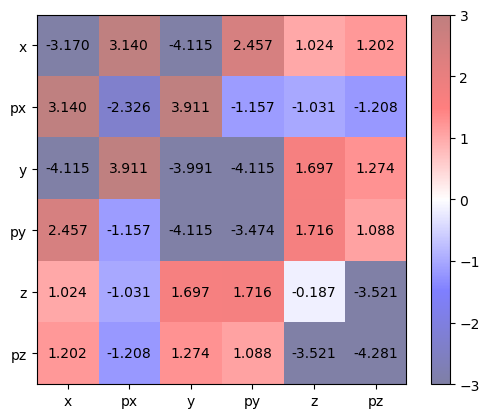

In [12]:
np.set_printoptions(precision=2, suppress=True)
show_cov_stats(pars, gt, beam_fraction=1.0)